<a href="https://colab.research.google.com/github/mc40in/Smart_Grid/blob/main/SmartGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Розрахунок балансу електричної енергії при комбінованому живленні.**

In [17]:
# Блок 1: Введення даних
import matplotlib.pyplot as plt
import numpy as np

def get_user_input():
    print("Enter the parameters for energy analysis:")

    # Споживання енергії за графіком навантаження по добі
    print("Enter energy consumption (kWh) for each 3-hour interval:")
    consumption_intervals = []
    for i in range(8):
        consumption_intervals.append(float(input(f"Interval {i + 1} (hours {i * 3}-{(i + 1) * 3}): ")))

    # Введення потужності сонячної установки
    solar_capacity = float(input("Enter the solar panel capacity (kW): "))

    # Вибір пори року для генерації енергії
    print("Select the season for solar generation:")
    print("1 - Winter")
    print("2 - Spring")
    print("3 - Summer")
    print("4 - Autumn")
    season = int(input("Enter the number corresponding to the season: "))

    # Генерація енергії за умовною залежністю від пори року та потужності установки
    if season == 1:  # Winter
        production_intervals = [solar_capacity * f for f in [0, 0, 0, 0.2, 0.6, 0.4, 0.2, 0]]
    elif season == 2:  # Spring
        production_intervals = [solar_capacity * f for f in [0, 0, 0.3, 0.7, 1.0, 0.9, 0.5, 0.2]]
    elif season == 3:  # Summer
        production_intervals = [solar_capacity * f for f in [0, 0, 0.5, 1.0, 1.2, 1.0, 0.6, 0.3]]
    elif season == 4:  # Autumn
        production_intervals = [solar_capacity * f for f in [0, 0, 0.3, 0.6, 0.8, 0.7, 0.4, 0.2]]
    else:
        print("Invalid season selected. Defaulting to Winter.")
        production_intervals = [solar_capacity * f for f in [0, 0, 0, 0.2, 0.6, 0.4, 0.2, 0]]

    return {
        'consumption_intervals': consumption_intervals,
        'production_intervals': production_intervals,
        'solar_capacity': solar_capacity
    }

variant = get_user_input()


Enter the parameters for energy analysis:
Enter energy consumption (kWh) for each 3-hour interval:
Interval 1 (hours 0-3): 3
Interval 2 (hours 3-6): 4
Interval 3 (hours 6-9): 2
Interval 4 (hours 9-12): 4
Interval 5 (hours 12-15): 5
Interval 6 (hours 15-18): 1
Interval 7 (hours 18-21): 2
Interval 8 (hours 21-24): 3
Enter the solar panel capacity (kW): 12
Select the season for solar generation:
1 - Winter
2 - Spring
3 - Summer
4 - Autumn
Enter the number corresponding to the season: 3


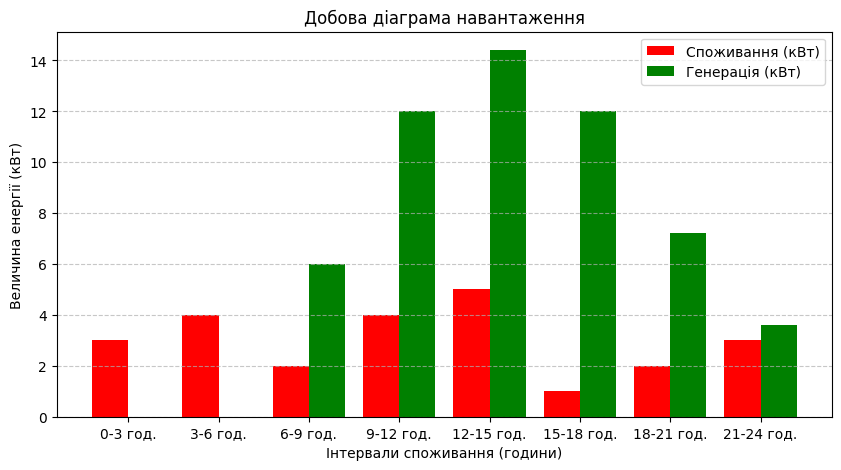


Analysis Results:
Total Consumption (kWh): 24.0
Total Production (kWh): 55.199999999999996
Energy Balance (kWh): 31.199999999999996


In [26]:
# Блок 2: Розрахунки та побудова графіків
def analyze_energy_flow(variant):
    # Дані варіанта
    consumption_intervals = variant['consumption_intervals']  # Споживання енергії
    production_intervals = variant['production_intervals']  # Виробництво енергії

    # Розрахунки
    total_consumption = sum(consumption_intervals)
    total_production = sum(production_intervals)
    balance = total_production - total_consumption  # Баланс енергії

    # Побудова стовпчастої діаграми
    time_labels = [f'{i * 3}-{(i + 1) * 3} год.' for i in range(8)]
    x = np.arange(len(time_labels))  # Позиції для стовпців

    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.2, consumption_intervals, width=0.4, label='Споживання (кВт)', color='red')
    plt.bar(x + 0.2, production_intervals, width=0.4, label='Генерація (кВт)', color='green')
    plt.title('Добова діаграма навантаження')
    plt.xlabel('Інтервали споживання (години)')
    plt.ylabel('Величина енергії (кВт)')
    plt.xticks(x, time_labels)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Результати аналізу
    return {
        'Total Consumption (kWh)': total_consumption,
        'Total Production (kWh)': total_production,
        'Energy Balance (kWh)': balance
    }

if variant:
    result = analyze_energy_flow(variant)
    print("\nAnalysis Results:")
    for key, value in result.items():
        print(f"{key}: {value}")


In [19]:
# Блок 3: Економічний аналіз
def economic_analysis(variant, result):
    total_consumption = result['Total Consumption (kWh)']
    total_production = result['Total Production (kWh)']

    # Введення вартості енергії
    grid_price = float(input("Enter the price of energy from the grid (UAH/kWh): "))
    solar_price = float(input("Enter the price of solar energy (UAH/kWh): "))

    # Розрахунок витрат
    grid_energy = max(total_consumption - total_production, 0)  # Енергія з мережі
    solar_energy = min(total_production, total_consumption)  # Використана сонячна енергія

    grid_cost = grid_energy * grid_price
    solar_cost = solar_energy * solar_price
    total_cost = grid_cost + solar_cost

    # Економічна ефективність
    cost_with_grid_only = total_consumption * grid_price
    savings = cost_with_grid_only - total_cost

    print("\nEconomic Analysis Results:")
    print(f"Grid Energy (kWh): {grid_energy:.2f}")
    print(f"Solar Energy (kWh): {solar_energy:.2f}")
    print(f"Grid Cost (UAH): {grid_cost:.2f}")
    print(f"Solar Cost (UAH): {solar_cost:.2f}")
    print(f"Total Cost (UAH): {total_cost:.2f}")
    print(f"Cost with Grid Only (UAH): {cost_with_grid_only:.2f}")
    print(f"Savings (UAH): {savings:.2f}")

if variant and result:
    economic_analysis(variant, result)

Enter the price of energy from the grid (UAH/kWh): 4
Enter the price of solar energy (UAH/kWh): 6

Economic Analysis Results:
Grid Energy (kWh): 0.00
Solar Energy (kWh): 24.00
Grid Cost (UAH): 0.00
Solar Cost (UAH): 144.00
Total Cost (UAH): 144.00
Cost with Grid Only (UAH): 96.00
Savings (UAH): -48.00


In [23]:
# Блок 4: Аналіз дефіциту або профіциту енергії

# Загальне споживання та генерація за добу
total_consumption = result['Total Consumption (kWh)']
total_production = result['Total Production (kWh)']

#total_consumption = sum(load_profile)  # кВт·год
#total_generation = sum(solar_generation)  # кВт·год

# Розрахунок енергетичного балансу
energy_balance = total_production - total_consumption

# Визначення рекомендацій
if energy_balance < 0:
    # Якщо є дефіцит
    deficit = abs(energy_balance)
    additional_panels = deficit / (sum(season_coefficients[season]) / len(season_coefficients[season]))
    print("\nРезультати блоку 4:")
    print(f"Загальне споживання: {total_consumption:.2f} кВт·год")
    print(f"Загальна генерація: {total_generation:.2f} кВт·год")
    print(f"Дефіцит енергії: {deficit:.2f} кВт·год")
    print(f"Рекомендація: Збільшити кількість сонячних панелей на потужність: {additional_panels:.2f} кВт")
elif energy_balance > 0:
    # Якщо є профіцит
    surplus = energy_balance
    recommended_battery_capacity = surplus
    print("\nРезультати блоку 4:")
    print(f"Загальне споживання: {total_consumption:.2f} кВт·год")
    print(f"Загальна генерація: {total_production:.2f} кВт·год")
    print(f"Профіцит енергії: {surplus:.2f} кВт·год")
    print(f"Рекомендація: Встановити акумулятор на ємність: {recommended_battery_capacity:.2f} кВт·год")
else:
    # Якщо баланс нульовий
    print("\nРезультати блоку 4:")
    print(f"Загальне споживання: {total_consumption:.2f} кВт·год")
    print(f"Загальна генерація: {total_production:.2f} кВт·год")
    print("Система збалансована, додаткових дій не потрібно.")



Результати блоку 4:
Загальне споживання: 24.00 кВт·год
Загальна генерація: 55.20 кВт·год
Профіцит енергії: 31.20 кВт·год
Рекомендація: Встановити акумулятор на ємність: 31.20 кВт·год
